In [212]:
#importing librairies
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as pltp 


In [213]:
#importing the csv file and cleaning up our data
df = pd.read_csv('./FD_people.csv')
#p = df.drop(["name","age","smoke","drink"], axis = 1)
#cleanup={"sex":{'M':1,'F':0}}
#df.replace(cleanup,inplace=True)
df= df.drop(["Unnamed: 0"], axis = 1)

df

,name,salary,age,sex,smoke,drink
0,Mr Sami,500,20,M,yes,yes
1,Lady Samia,2700,48,F,no,no
2,Miss Miriam,700,22,F,no,no
3,Mr Ahmed,500,21,M,no,yes
4,Dona siwar,300,19,F,yes,no


<AxesSubplot:xlabel='sex', ylabel='Count'>

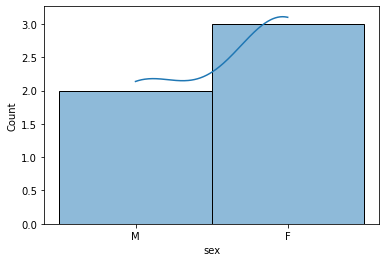

In [214]:
#show the distribution of people (feature = sex)
sns.histplot(df['sex'],bins=5,kde=True)


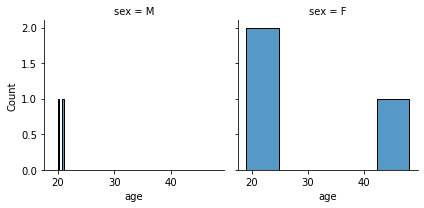

In [215]:
#this is gonna show the corralation between sex and age
p = sns.FacetGrid(df,col="sex")
p.map(sns.histplot,"age",bins=5)

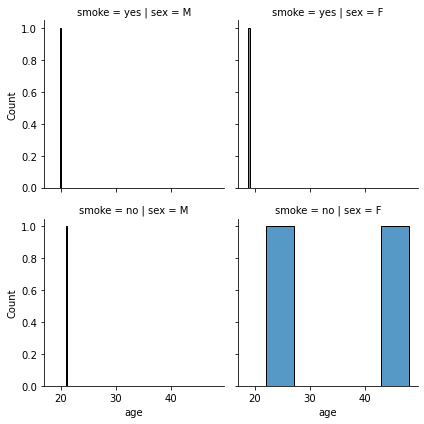

In [216]:
#this is gonna show the corralation between the person's sex and their habits (smoker or not) and  their age
p = sns.FacetGrid(df,col="sex",row="smoke")
p.map(sns.histplot,"age",bins=5)

          salary       age
salary  1.000000  0.997982
age     0.997982  1.000000


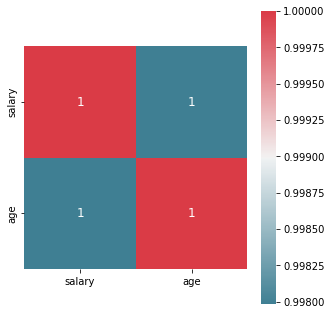

In [217]:
def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = pltp.subplots( figsize =( 5 , 6 ) )

    cmap = sns.diverging_palette( 220 , 10, as_cmap = True )
    print(corr)

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 


        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
  
plot_correlation_map( df )    

In [218]:
"""this function will allow us the visulize the corralation between salary and age using a heat map (age and salary are 
normalized so we can compare accuratly)"""

'this function will allow us the visulize the corralation between salary and age using a heat map (age and salary are \nnormalized so we can compare accuratly)'

In [219]:
Title_Dictionary = {

                    "Capt":       "Officer",

                    "Col":        "Officer",

                    "Major":      "Officer",

                      "Dr":         "Officer",

                    "Rev":        "Officer",
    
                    "Jonkheer":   "Royalty",

                    "Don":        "Royalty",

                    "Sir" :       "Royalty",

                   "Lady" :      "Royalty",

                  "the Countess" : "Royalty",

                    "Dona":       "Royalty",

                    "Mme":        "Miss",

                    "Mlle":       "Miss",

                    "Miss" :      "Miss",

                    "Ms":         "Mrs",

                    "Mr" :        "Mrs",

                    "Mrs" :       "Mrs",

                    "Master" :    "Master"

                    }
d = df["name"]
df= df.drop(["name"], axis = 1)
l = []
for c in d:
    i = c 
    j = 0
    x = ''
    while i[j] != ' ':
        x += i[j]
        j+=1
    l.append(Title_Dictionary[x])
   
df["title"] = l   


In [220]:
df

,salary,age,sex,smoke,drink,title
0,500,20,M,yes,yes,Mrs
1,2700,48,F,no,no,Royalty
2,700,22,F,no,no,Miss
3,500,21,M,no,yes,Mrs
4,300,19,F,yes,no,Royalty
